<a href="https://colab.research.google.com/github/mycodelocker/ArtificialIntelligence/blob/main/14042021_mbo_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.book import text4

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
from nltk.corpus import inaugural

In [ ]:
inaugural.fileids()[-2:]

['2005-Bush.txt', '2009-Obama.txt']

In [ ]:
import nltk

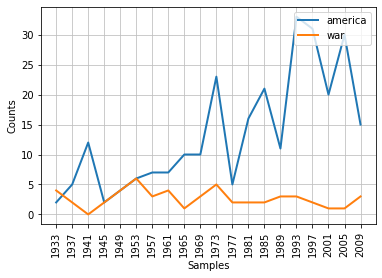

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()[-20:]
    for w in inaugural.words(fileid)
    for target in ['america', 'war']
    if w.lower().startswith(target))
cfd.plot()

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

In [ ]:
print(data.describe())

                   0              1              2              3          4   \
count            7501           5747           4389           3345       2529   
unique            115            117            115            114        110   
top     mineral water  mineral water  mineral water  mineral water  green tea   
freq              577            484            375            201        153   

                  5          6          7          8          9   \
count           1864       1369        981        654        395   
unique           106        102         98         88         80   
top     french fries  green tea  green tea  green tea  green tea   
freq             107         96         67         57         31   

                    10         11         12         13         14    15  \
count              256        154         87         47         25     8   
unique              66         50         43         28         19     8   
top     low fat yogurt  g

<AxesSubplot:>

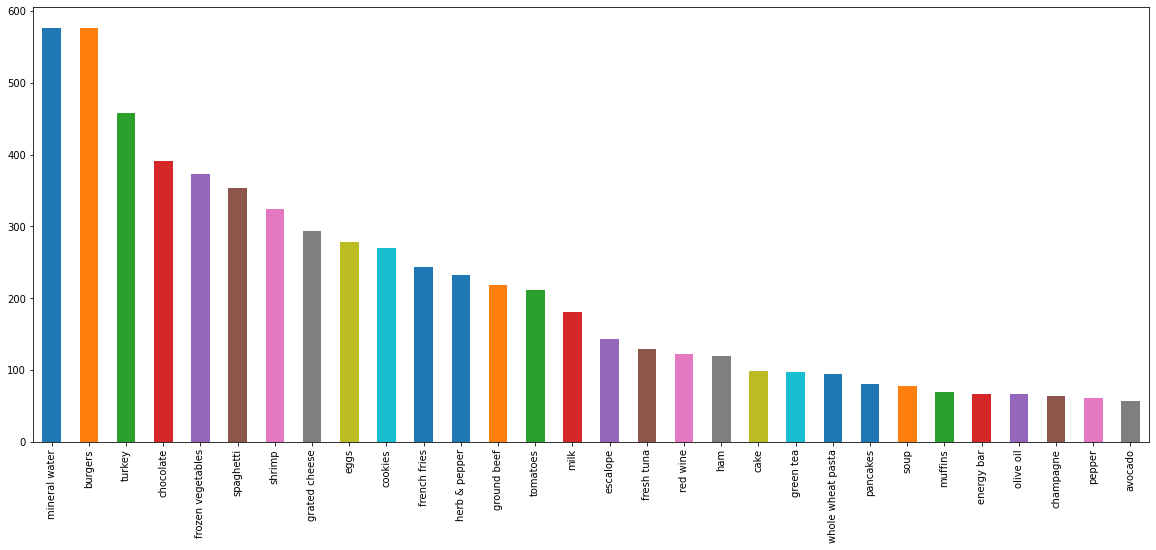

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
data[0].value_counts().head(30).plot(kind='bar')

In [ ]:
y = data[0].value_counts().head(50).to_frame()
print(y.index)

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'tomato sauce', 'strawberries', 'yams', 'oil'],
      dtype='object')


In [ ]:
data['food'] = 'Food'
food = data.truncate(before=-1,after=15)

In [ ]:
import networkx as nx

In [ ]:
food = nx.from_pandas_edgelist(food,source='food',target=0, edge_attr=True)

{'Food': Text(-0.011631222357796534, -0.00476541691724009, 'Food'),
 'shrimp': Text(-0.3229037229861586, 0.8799067430619705, 'shrimp'),
 'burgers': Text(-0.3277295259807413, -0.8982294069446961, 'burgers'),
 'chutney': Text(0.6430476824572038, 0.7761623526938378, 'chutney'),
 'turkey': Text(0.5544538753267361, -0.7559461712989218, 'turkey'),
 'mineral water': Text(-0.9253058499453625, -0.23691736690225457, 'mineral water'),
 'low fat yogurt': Text(0.12887419201727207, -0.9246565362957017, 'low fat yogurt'),
 'whole wheat pasta': Text(0.1428891057772632, 0.9207925998220576, 'whole wheat pasta'),
 'soup': Text(0.5735826778310781, 0.307594655637007, 'soup'),
 'frozen vegetables': Text(-0.9064769338607725, 0.21807562599011784, 'frozen vegetables'),
 'french fries': Text(1.0, 0.10708539130474755, 'french fries'),
 'eggs': Text(-0.7092575078656169, 0.6287241881645215, 'eggs'),
 'cookies': Text(-0.6896924286706769, -0.6240775656690637, 'cookies'),
 'spaghetti': Text(0.8501496582575727, -0.393

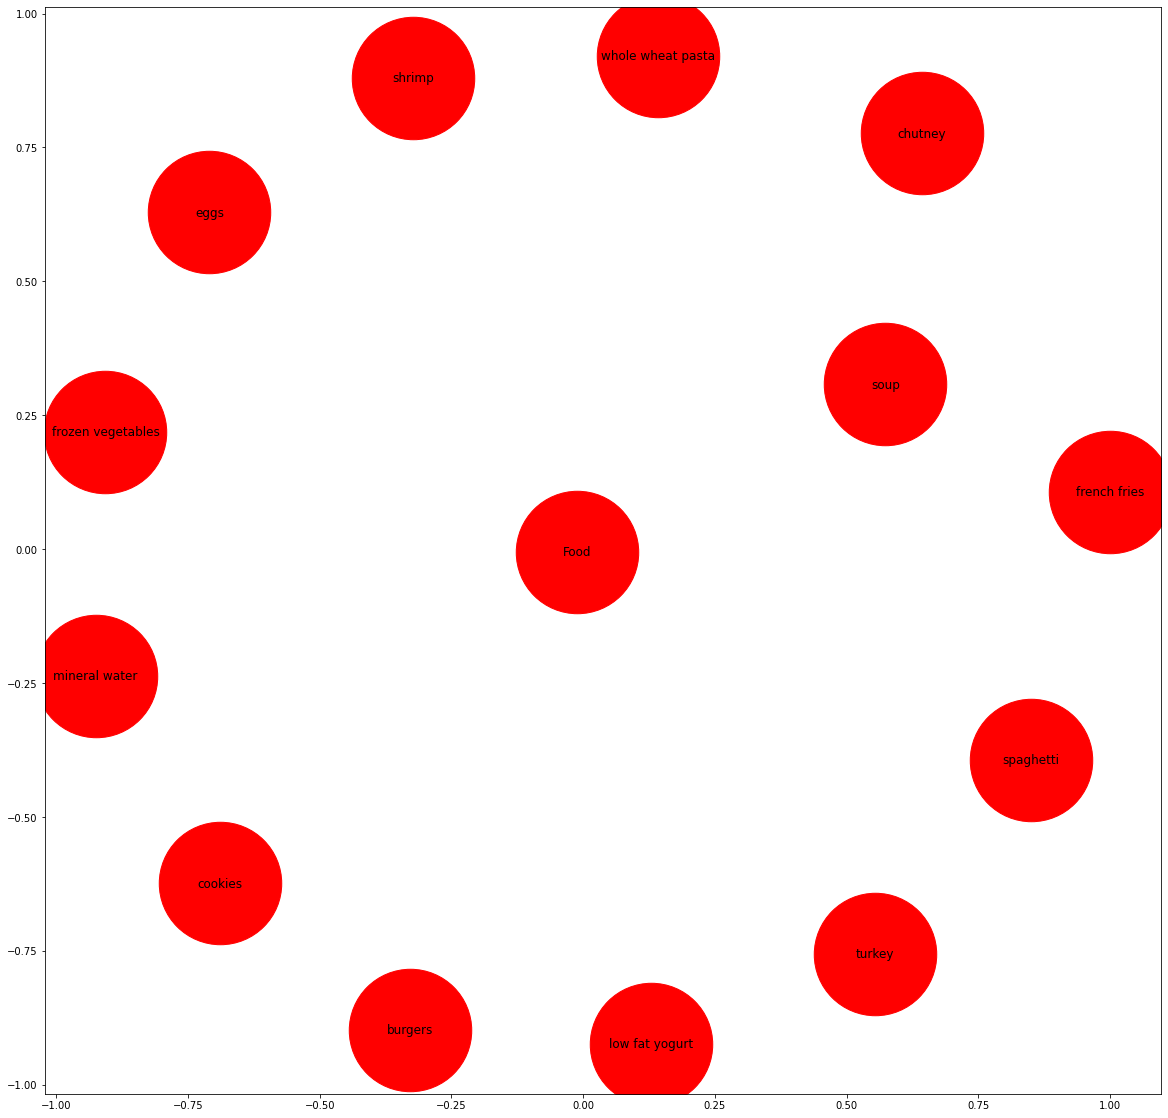

In [ ]:
plt.rcParams['figure.figsize'] = (20,20)
pos = nx.spring_layout(food)
nx.draw_networkx_nodes(food,pos,node_size=15000)
nx.draw_networkx_labels(food,pos)

In [ ]:
trans = []
for i in range(7501):
    trans.append([str(data.values[i,j]) for j in range(20)])

In [ ]:
trans = np.array(trans)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()

In [ ]:
data = te.fit_transform(trans)
data = pd.DataFrame(data,columns=te.columns_)

In [ ]:
print(data.head())

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries    ...     turkey  \
0  False           False      False        False    ...      False   
1  False           False      False        False    ...      False   
2  False           False      False        False    ...      False   
3  False           False      False        False    ...       True   
4  False           False      False        False    ...      False   

   vegetables mix  water spray  white wine  whole weat flour  \
0            True        False       False    

In [ ]:
data = data.loc[:,['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'tomato sauce', 'strawberries', 'yams', 'oil']]

In [ ]:
apriori(data,min_support=0.01,use_colnames=True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
5,0.174110,(spaghetti)
6,0.071457,(shrimp)
7,0.052393,(grated cheese)
8,0.179709,(eggs)
9,0.080389,(cookies)


In [ ]:
apriori(data,min_support=0.05,use_colnames=True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
5,0.174110,(spaghetti)
6,0.071457,(shrimp)
7,0.052393,(grated cheese)
8,0.179709,(eggs)
9,0.080389,(cookies)
